## IMPORTED LIBRARIES

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from operator import itemgetter
import random
import time

<h1><center>ABSTRACT</center></h1>
<p style='text-align: justify;'> The study of Susceptible-Zombie Model (SZ model) is playing a key role in numerical study of modern epidemiology to understand several critical phenomena in epidemiology. This project will give valuable insight upon the zombie outbreak same as the previous project, however, we will use the famous Monte Carlo techniques to solve SZ model. The idea of a Monte Carlo simulation is to test various outcome possibilities and to assess the risk of the implemented strategy. Therefore, we model the zombie outbreak stochastically, using these techniques. Furthermore, idea of random walk, a stochastic or random process describing a path that consists of a succession of random steps on some mathematical space, is introduced in 2D lattice grid. This process will help us to predict how walkers behave when allowed to interact randomly. This numerical model allows us to derive the approximate interaction times and certain model parameters like reproduction number, beta etc. leading to the conclusion on how to best delay the inevitable merging.  Moreover, we examine the impact of quantifying probabilities by plotting graphs and histograms in different scenarios while predicting the different paths for spreading of disease in the population. </p>

<h1><center>INTRODUCTION</center></h1>
<p style='text-align: justify;'>The previous project successfully explained SZ model providing the valuable information about the behavior of zombie outbreak. Thought many important facts came to the knowledge about the epidemic outbreaks, yet, many questions were left unexplained. The probability of infection β showed the declining nature as a function of time leading to the extinction of zombie outbreak from that region. However, it didn’t explain the rapid declining of infection. For Ebola virus outbreak in Liberia, disease couldn’t die even after the six months of outbreak which was alarming situation. [5] Therefore, SZ should be further studied to answer any unexplained facts during an epidemic outbreak. In this project, we are again discussing the zombie outbreaks previously studied in project 3, however, we are using Monte Carlo techniques to solve the SZ model instead of mixing or compartment models. Monte Carlo (MC) methods are a subset of computational algorithms that use the process of repeated random sampling to make numerical estimations of unknown parameters.[1] We developed a numerical solver based upon the Monte Carlo simulation to explain fate of humans and zombies and studied how randomness affected the solution. Then the idea of random walk in 2D lattice is introduced to study the SZ model which is somewhat similar to MRI and NMR. Random walks explain the observed behaviors of many processes in many fields, and thus serve as a fundamental model for the recorded stochastic activity.[2] The walkers were allowed to move only in2 dimensions (x- or y- directions) but not both at the same time (i.e. east, south, west and south). Graphs were plotted to explain the expected time development of the two populations. Moreover, we modified our model to get the values for β as a function of time based on observed changes in the random walker population. The outcome of random walk is then compared with the analytical solution of SZ model. Several scenarios were introduced to study the behavior of β and recovery rate α as a function of time while explaining the behavior of reproduction number Ro. Later in the project, we divided the humans into young and old population while assuming that young humans will move faster than the old humans. Following the assumption, we simulated the SZ model and recorded the human-zombie interactions. Finally, we implemented our scenarios to explore. In first scenario, we divided both humans and zombies into young and old population. Giving the older population a probability of 30% of killing the zombie if they survive.In the second scenario, we established a safe zone in one part of the square lattice, i.e.  an area in which only humans are allowed to enter, and no human-zombie interaction is possible in that area. In the third scenarios, we introduced a highly trained gun-squad to kill zombies with the assumption that any member of gun squad cannot be killed by a zombie. We simulated the SZ model with these assumptions and recorded the behavior of the model. These scenarios gave us the general idea about how the fate of humans could be improved.  </p>

# Exercise 1: Solving SZ model using Monte Carlo

#### Analytical Solution of SZ Model:
<p style='text-align: justify;'> The following function is implemented to calculate the analytical solution of the SZ model as calculated in the project 3. According to the scene setting, the human who are converted into zombies will continue to attack humans and the rate of infection that is,Beta, will remain constant throughout, which implies that human population in both the villages will surely and steadly dwindle with the passage of time. In the analytical solution,we are assuming that rural population are very peace loving and do not have means to kill zombies (which is not very realistic) or the government don't recognize the threat and don't mobilize any task force to take the matter seriously. Which ends up taking the whole village in frenzy and converting all of them into zombies. </p>

In [2]:
"""
ana_solution is created to calculate the number of zombies and humans.Beta is represented as beta and has 
constant value which is 0.06. Beta is the rate at which the infection spread between humans and it is intialised with which z=1 
and total population is 683.
"""
def analytical_sol(t_st,t_final,dt,s0,z0=1):
    
    beta=0.06                                                    #initial beta
    t = t_st
    t_array=[]
    sol_st=[] 
    sol_zt=[]
    
    while(t<t_final):                                            # loop for creating time
        t_array.append(t)
        t+=dt
        
    for ti in t_array :
    
        st_nom = ((s0+z0)*(s0/z0)*np.exp(-1*beta*ti))           #functions for creating S(t) and Z(t)
        st_denom= (1 +(s0/z0)*np.exp(-1*beta*ti))
        zt_nom = s0+z0
        
        st = (st_nom/st_denom)
        zt= (zt_nom/st_denom)
        sol_st.append(st)
        sol_zt.append(zt)
    
    return  sol_st , sol_zt,t_array                             # returns the analytical solution

sol_st , sol_zt,time_ana = analytical_sol(0,200,1,673,10)       # calling the analytical function 

#### PART 1:

<p style='text-align: justify;'> 
In this exercise, we plotted the SZ model with initial population of 683 and 10 zombies and with infection rate beta=0.06. According to the scene setting, when there is human zombie interaction we need to generate a random number and that will be compared with the probability which is calculated by considering the time step and zombies at that time step and total population . if the value of random number is less than the probability then we need to increment the value of zombies and decrease the value of human and these values are plotted.[3] </p>

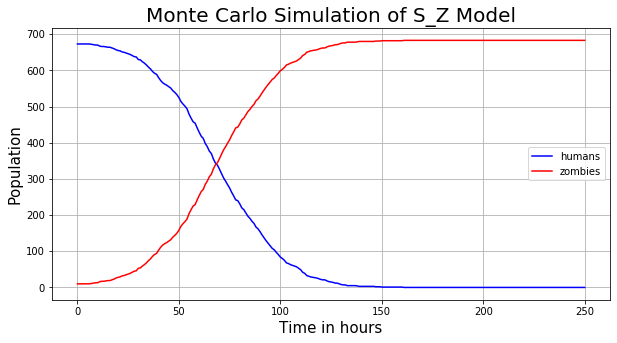

In [3]:
""" 
In This Program S_z is used to caaluclate the number of humans and zombies after every time step.Beta is infection rate 
beta=0.06 and the time step delta_t is one hour.
"""

def S_Z(s_initial,z_initial,delta_t,t_final):               # Declaring the function 
    t=0                                                     # intiating time with Zero hours
    N=s_initial+z_initial                                   # Total Population
    beta=0.06                                               # infection rate
    num_humans=[s_initial]
    num_zombies=[z_initial]
    times = [0]
    p_z=beta*delta_t*(z_initial/N)                          # Probablity of humans turning in to zombies
    time_counter = 0 
    while (t<t_final):                                      # Iterating over time 
        t+=delta_t                                          # incrementing over time in hours
        S = num_humans[time_counter]                        # Humans 
        Z = num_zombies[time_counter]                       # zombies
        for i in range(S):
            u=np.random.uniform(0,1)                        # Random number generation
            if u < p_z:
                S -= 1                                      # Decrement of humans
                Z += 1                                      # increment of zombies
                p_z=beta*delta_t*(Z/N)                      # probality updating with new Zombies count
        num_humans.append(S)                                # appending humnas array
        num_zombies.append(Z)                               # appenidng zombies array
        times.append(t)
        time_counter += 1
    return times,num_humans,num_zombies                     # returns the value of humans ,zombies,time 

        
time,human,zombies=S_Z(673,10,1,250)                        # calling S_Z function 

## plotting the comparision of S_Z  function ##

plt.figure(figsize=(10,5))
plt.title('Monte Carlo Simulation of S_Z Model',fontsize=20)
plt.xlabel('Time in hours',fontsize=15)
plt.ylabel('Population',fontsize=15)
plt.plot(time,human,"b-",label='humans' )
plt.plot(time,zombies,"r-",label='zombies')
plt.legend()
plt.grid()

__In the above graphs__, it can be noted that half of the population is converted into zombie before 75 hours and the infection will completely wipe out the population at around 160 hours

#### PART 2:

<p style='text-align: justify;'> In this exercise, we will iterate the above routine for 200 times and will plot the mean and standard deviation of humans and zombies. Analytical solution of this SZ model will also be plotted in the graph to compare the numerical and analytical solutions. We will also make the histograms of survivours after 100 hours.</p>

In [4]:
''' In this Program Monte_carlo function is used to over number of iteration N which will give array of humans and zombies'''

def Monte_Carlo(N,s_initial,z_initial,delta_t,t_final):                  # initalising the function
    time_=[]                                                            
    humans_=[]
    zombies_=[] 
    for i in range (0,N):                                                # interating over N 
        time,human,zombie=S_Z(s_initial,z_initial,delta_t,t_final)       # callin the SZ funtion 
        time_.append(time)                                               # updating the times
        humans_.append(human)                                            # updating human values
        zombies_.append(zombie)                                          # upadting zombie values
    return np.array(time_),np.array(humans_),np.array(zombies_)
time,humans,zombies=Monte_Carlo(200,673,10,1,250)                        # calling the function

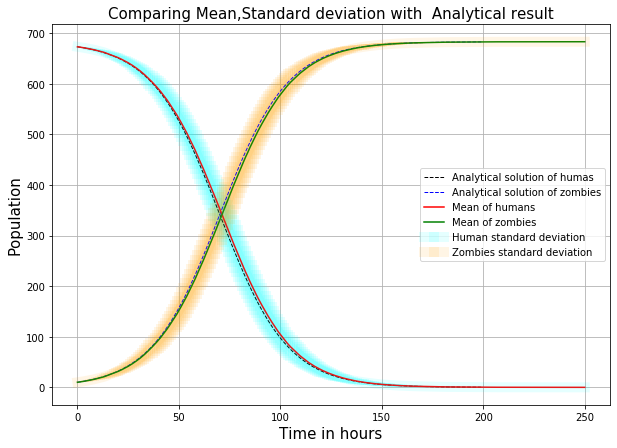

In [5]:
## calculating mean and standard deviation ####

human_list=humans
zombies_list=zombies
time_list= time
result_humans = [np.mean(k) for k in zip(*human_list)]                    # mean value of humans
result_zombies = [np.mean(k) for k in zip(*zombies_list)]                 # mean value of zombies
result_time = [np.mean(k) for k in zip(*time_list)]                       # mean value of time
std_zomb = [np.std(k) for k in zip(*zombies_list)]                        # standard deveation value  of zombies
std_hum = [np.std(k) for k in zip(*human_list)]                           # standard deveation  value of humans

                             
## plotting the analytical solution with the Monte carlo results ##

plt.figure(figsize=(10,7))
plt.title('Comparing Mean,Standard deviation with  Analytical result',fontsize=15)
plt.plot(time_ana, sol_st, '--', linewidth=1, color='black',label='Analytical solution of humas')
plt.plot(time_ana, sol_zt, '--', linewidth=1, color='blue',label='Analytical solution of zombies')
plt.plot(result_time,result_humans,label='Mean of humans',color='red')
plt.plot(result_time,result_zombies,label='Mean of zombies',color='green')
plt.errorbar(result_time,result_humans,std_hum,label='Human standard deviation',alpha=0.1,color='cyan',linewidth=10)
plt.errorbar(result_time,result_zombies,std_zomb,label="Zombies standard deviation",alpha=0.1,color='orange',linewidth=10)
plt.xlabel('Time in hours',fontsize=15)
plt.ylabel('Population',fontsize=15)
plt.legend()
plt.grid()

###### In the graphs above, it can be observed that there is little to no difference between analytical soultion of SZ model and  mean & standard deviation of humans and zombies calculated using Monte Carlo simulations. At approx. 75 hours, the human and zombie poulations become equal.  Despite the randomness in the solution, model shows the same behaviour as that of analytical solution.  

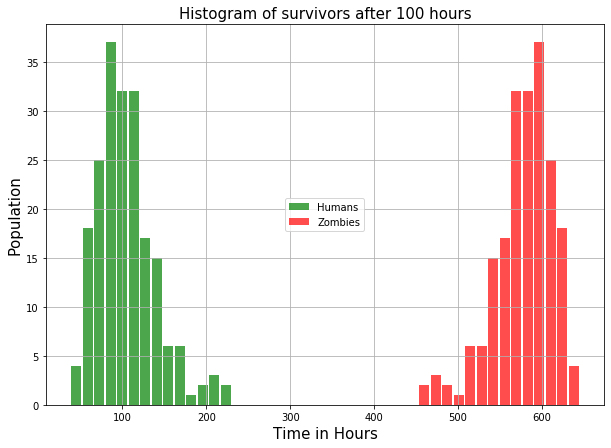

In [6]:
## plotting histogram after 100 hours for the Monte Carlo simulation##

plt.figure(figsize=(10,7))
plt.hist(human_list[:,100],bins='auto',color= "green",alpha= 0.7,rwidth=0.85,label = "Humans")
plt.hist(zombies_list[:,100],bins='auto',color= "red",alpha= 0.7,rwidth=0.85,label = "Zombies")
plt.title('Histogram of survivors after 100 hours',fontsize=15)
plt.xlabel("Time in Hours",fontsize=15)
plt.ylabel("Population",fontsize=15)
plt.legend(loc='center')
plt.grid()

###### The above histogram clearly shows the similar behaviour of humans and zombies which was shown by a graph earlier that populations of humans and zombies show similar behaviour and changing proportionally.

#### PART 3:

In this part, we will compare the results of Monte Carlo simulation for SZ model when there is initially only one zombie aand when there are 10 zombies present at the start of simulations.

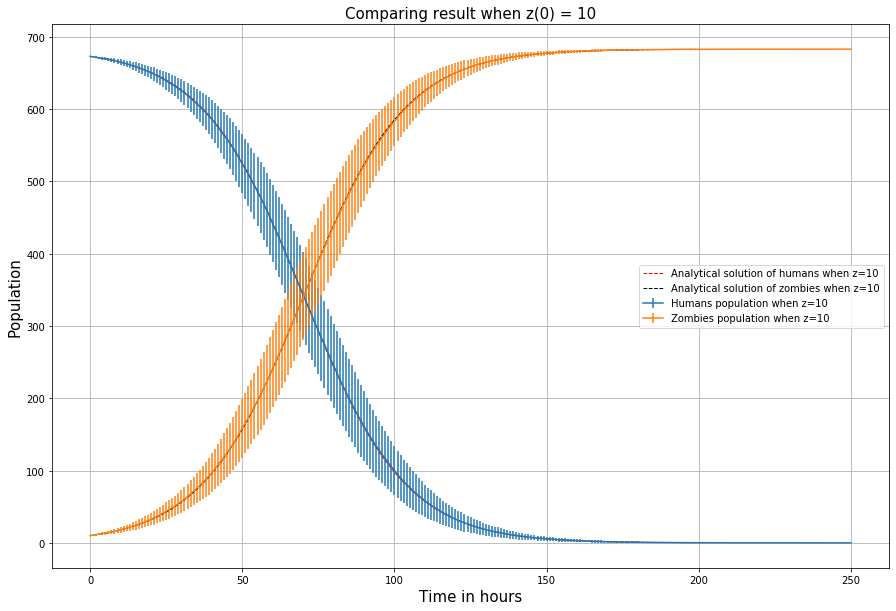

In [7]:
"""  In this Program we are calling Monte_carlo function  with intail value of Zombies =10
    h1=humans , z1=zombies ,t1= time for analytical function
    time_0,humans_10,zombies_10 = time,humans,zombies 
"""                       

time_0,humans_10,zombies_10=Monte_Carlo(200,673,10,1,250)               # calling fucntion with zombies with count ten                                
human_list_new=humans_10
zombies_list_new=zombies_10
time_list_new= time_0


'calulcating mean of humans and zombies for Monte carlo function when z=10'

result_humans_new = [np.mean(k) for k in zip(*human_list_new)]                    # mean value of humans
result_zombies_new = [np.mean(k) for k in zip(*zombies_list_new)]                 # mean value of zombies
result_time_new = [np.mean(k) for k in zip(*time_list_new)]                       # mena value of time
std_zomb_new = [np.std(k) for k in zip(*zombies_list_new)]                        # standard deveation value  of zombies
std_hum_new = [np.std(k) for k in zip(*human_list_new)]                           # standard deveation  value of humans

'plotting the result and comparing Analytical and monte carlo function'

plt.figure(figsize=(15,10))
plt.title("Comparing result when z(0) = 10",fontsize=15)
plt.xlabel('Time in hours', fontsize=15)
plt.ylabel('Population',fontsize=15)
plt.plot(time_ana, sol_st, '--', linewidth=1, color='red',label='Analytical solution of humans when z=10')
plt.plot(time_ana, sol_zt, '--', linewidth=1, color='black',label='Analytical solution of zombies when z=10')
plt.errorbar(result_time,result_humans,std_hum,label='Humans population when z=10')
plt.errorbar(result_time,result_zombies,std_zomb,label='Zombies population when z=10')
plt.legend(loc='center right')
plt.grid()


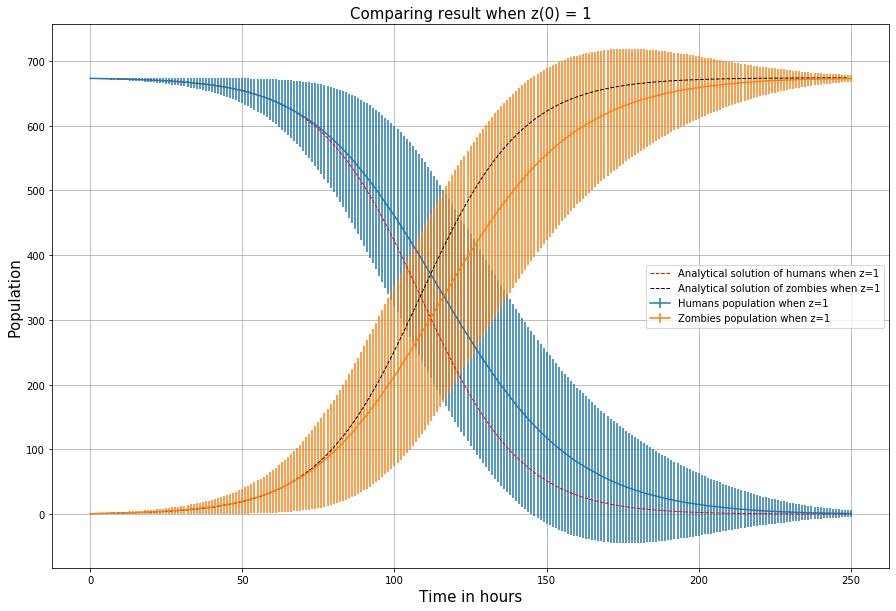

In [8]:
""" In this Program we are calling Monte_carlo function  with intail value of Zombies = 1
    h1=humans , z1=zombies ,t1= time for analytical function
    time_0,humans_0,zombies_0 = time,humans,zombies
""" 

h1,z1,t1=analytical_sol(0,250,1,673,1)                      # calling function to get analytical soution when z = 1

time_0,humans_0,zombies_0=Monte_Carlo(200,673,1,1,250)      # calling MC simulation fucntion with zombies with count one
human_list_old=humans_0
zombies_list_old=zombies_0
time_list_old= time_0

"calulcating mean of humans and zombies when z=1"

result_humans_old = [np.mean(k) for k in zip(*human_list_old)]                    # mean value of humans
result_zombies_old = [np.mean(k) for k in zip(*zombies_list_old)]                 # mean value of zombies
result_time_old = [np.mean(k) for k in zip(*time_list_old)]                       # mena value of times
std_zomb_old = [np.std(k) for k in zip(*zombies_list_old)]                        # standard deveation value  of zombies
std_hum_old = [np.std(k) for k in zip(*human_list_old)]                           # standard deveation  value of humans

"plotting the graph for analytical solution and MC solution "

plt.figure(figsize=(15,10))
plt.plot(t1, h1, '--', linewidth=1, color='red',label='Analytical solution of humans when z=1')
plt.plot(t1, z1, '--', linewidth=1, color='black',label='Analytical solution of zombies when z=1')
plt.errorbar(result_time_old,result_humans_old,std_hum_old,label='Humans population when z=1')
plt.errorbar(result_time_old,result_zombies_old,std_zomb_old,label='Zombies population when z=1')
plt.title("Comparing result when z(0) = 1",fontsize=15)
plt.xlabel('Time in hours', fontsize=15)
plt.ylabel('Population',fontsize=15)
plt.legend(loc='center right')
plt.grid()


###### In the above graphs, it can be seen that when simulation is initialized with 10 zombies, the MC simulation shows the similar behaviour as that of analytical solution and it converges towards the continuum solution. Half of the population was conerted to zombies after 75 hours. Randomness has a very little effect upon the MC simulations when z(0) = 10.  However, when we initialized the simulation with only one simulation then the MC solution diverges from the analytical solution. For analytical solution, half of the population changes into zombies after approx. 110 hours while for MC solution, it occurs approx. after  125 hours. The total conversion time is also slightly different for both solutions. The analytical solution is more accurate than the MC model and the slight difference in MC solution is due to the randomness of the MC simulations. 

# Exercise 2: Random walking dead

#### PART 1:
<p style='text-align: justify;'> In this part, we are going to develop similar model as that of MRI (magnetic resonance imaging). We are going to introduce the concept of random walk in which walkers can have different features.[4] We will make a 2D square lattice which can be interpreted as an isolated island or abandoned village. The walkers are free to move in only two dimensions (x- or y- direction) but only in one direction at a time (i.e. east, west, south or north) in that lattice. We will also check for the illegal positions of walkers, which means that, if walker is going outside our declared lattice, we will bring it back to its old position to keep it inside the declared space. We will investigate each move at every time step and after every move, we will find all the nodes where both humans and zombies are present. Every human will encounter zombie at such site. We will introduce a random number, u, between 0 and 1 in such a manner that if probability of human that is infected, q, is less than u then it will converted into zombie. We will then estimate beta as a fucntion of time. Finally we will lower the probability q and investigate the behaviour of beta as a function of time. </p> 

In [9]:
''' 
Creating a Initial_state function
a= Number of population
r= lattice size 
old = conditional statement for controlling the loops
'''

def initial_state(r,a,old):
    global N_           # Total population
    global nxy_         # Lattice size (a square) nx=ny
    global State_       # Global State to record the values in the State 
    global HUMAN_       # Global Value for the Human to change the value of State
    global ZOMBIE_      # Declaring a Variable for Zombie
    global DEAD_        # Global Variable for Dead state
    global Humans
    global zombies
    global dead
    global YOUNG_
    global OLD_
    global Walkers_     # (x,y) coordinate of each walker at time T
    global Walkers_Old_
    global q            
    
    nxy_= r            # 
    N_=a
    HUMAN_  = 0
    ZOMBIE_ = 1
    DEAD_   = 2
    YOUNG_ = 3
    OLD_= 4
    Walkers_=np.random.randint(nxy_+1,size=(N_,2))
    q = np.full(len(Walkers_),0.9)                  # propability assigining 
    
    State_=np.zeros(N_,dtype=int)                   # Set all Walkers to Human
    State_[0]=ZOMBIE_                               # Set one of them to a Zombie
    if old == True:                                 # used in exercise 4 
        State_[1:342]=OLD_
        State_[342:]=YOUNG_
        Humans=Walkers_[np.logical_or(State_==OLD_,State_==YOUNG_)]
    else:                                            # used in exercise 2,3
        Humans=Walkers_[State_ == HUMAN_]            # assingining humans when state is true with humans
        zombies= Walkers_[State_==ZOMBIE_]           # assingining humans when state is true with zombies 
    Walkers_Old_ = Walkers_.copy()                   # copying older walkers position
    
    return 

In [10]:
""" In this the next_pos function we are upadting the the postion of Walkers """

def next_pos():                                               
    next_pos=[]
    global Walkers_
    global State_
    
    for i in range(len(Walkers_)):                      
        if (State_[i] == OLD_ ) :                                  
            x = random.choice([(0,1),(0,-1),(1,0),(-1,0), (0,0)])  # this create five postion with 20% each probality to choose
            next_pos.append(x)
            
        else :
            x = random.choice([(0,1),(0,-1),(1,0),(-1,0)])     # x is choice from random postion 
            next_pos.append(x)
        
    Walkers_ += next_pos                                       # assigining updated postion to each walkers

In [11]:
""""this function will check for illegal postion of walkers and get the back to old postions """

def illegal_pos():    
    for i in range (len(Walkers_)):                                # nxy_ lattice size x,y
        if(Walkers_[i][0]>nxy_):                                   # checking x coordinate of walkers which are above nxy_
            Walkers_[i][0]=Walkers_Old_[i][0]                      # assigning old  walker co-ordinate in x 
        elif(Walkers_[i][0]<0):                                    # checking x coordinate of walkers which are in -x direction
            Walkers_[i][0]=Walkers_Old_[i][0]                      # assigning old walker co-ordinate in x
        if(Walkers_[i][1]>nxy_):                                   # checking y coordinate of walkers which are above nxy_
            Walkers_[i][1]=Walkers_Old_[i][1]                      # assigning old walker co-ordinate in y
        elif(Walkers_[i][1]<0):                                    # checking y coordinate of walkers which are in -Y
            Walkers_[i][1]=Walkers_Old_[i][1]                      # assigning old walker co-ordinate in y
    return

In [12]:
""" This is the fence that we wil use in the excercise 5. It keeps the zombies outside the fence and thus helping
Humans to survive"""
def fence():
    zombies = Walkers_[State_== ZOMBIE_]
    for i in range (len(zombies)):
        if(zombies[i][0]>nxy_-10):
            zombies[i][0]= nxy_-10
        elif(zombies[i][0]<0):    
            zombies[i][0]=0
        if(zombies[i][1]>nxy_-10):
            zombies[i][1]=nxy_-10 
        elif(zombies[i][1]<0): 
            zombies[i][1]=0
    Walkers_[State_== ZOMBIE_] = zombies
    return

In [13]:
""" To make Scatter graph"""
def Show_walkers():
    plt.figure()
    plt.scatter(Humans[:,0],Humans[:,1])
    plt.scatter(zombies[:,0],zombies[:,1])
    return

In [14]:
""" In this Colliosn function we are ussing four argumnets dead1,dead2,Base, and old which are used to simulate different 
    scenarios in different parts in comming exercises
"""

def collision(dead1,old,Base,dead2):                              # creating  a function
    global Humans                                               
    global zombies
    global dead
    zombies = np.where(State_ == ZOMBIE_)[0]                      
    if (dead2 == True):                                          # used in exercise 3 part 2 caluclating beta
        for i, i_zom in enumerate(zombies):
            # Find coordinates of the current zombie:
            pos_x = Walkers_[i_zom, 0]
            pos_y = Walkers_[i_zom, 1]
            # Find indices of all walkers that are at the same place:
            ids_same_place = np.where((Walkers_[:, 0] == pos_x) & (Walkers_[:, 1] == pos_y))[0]
            humans_same_place = ids_same_place[State_[ids_same_place]==HUMAN_]   # checking for postion where humans are prest in zombies
            zombies_same_place = ids_same_place[State_[ids_same_place]==ZOMBIE_] 
            for i in range(len(humans_same_place)):
                u = np.random.uniform(0,1)
                if u<q[humans_same_place[i]]:                                    # checking for probaality of each human
                    State_[humans_same_place[i]]=ZOMBIE_                         # converting humans state to zombie
                else:
                    q[humans_same_place[i]] = q[humans_same_place[i]]*0.5        # updating new propablity to humans 
        zombies=Walkers_[State_== ZOMBIE_]                                       
        Humans=Walkers_[State_== HUMAN_]      
        z,h = len(zombies),len (Humans)                                          # calucalting lenght of humans and zombies
        return h,z                                                               # returning the values
 
    if (dead1 == True and old == False):                                         # used in exercise 3 part 3 
        for i, i_zom in enumerate(zombies):
            pos_x = Walkers_[i_zom, 0]
            pos_y = Walkers_[i_zom, 1]
            ids_same_place = np.where((Walkers_[:, 0] == pos_x) & (Walkers_[:, 1] == pos_y))[0]
            humans_same_place = ids_same_place[State_[ids_same_place]==HUMAN_]
            zombies_same_place = ids_same_place[State_[ids_same_place]==ZOMBIE_]
            for i in range(len(humans_same_place)):
                u = np.random.uniform(0,1)
                if u<q[humans_same_place[i]]:
                    State_[humans_same_place[i]]=ZOMBIE_
                else:
                    q[humans_same_place[i]] = q[humans_same_place[i]]*0.5
                    State_[i_zom]=DEAD_                                           # making current location of zombies as dead
        zombies=Walkers_[State_== ZOMBIE_]
        Humans=Walkers_[State_== HUMAN_]
        dead = Walkers_[State_==DEAD_]                                            # upadting dead 
        z,h,d = len(zombies),len (Humans),len(dead)                               # calulcating lengeth of zombies,humans and dead
        return h,z,d
    
    if (old == True and dead1 == False):                       # used in exercise 4 part 1
            for i, i_zom in enumerate(zombies):
                pos_x = Walkers_[i_zom, 0]
                pos_y = Walkers_[i_zom, 1]               
                ids_same_place = np.where((Walkers_[:, 0] == pos_x) & (Walkers_[:, 1] == pos_y))[0]
                 # We are only interested in the young and old humans at same place as zombies:
                humans_same_place = ids_same_place[np.logical_or(State_[ids_same_place]==OLD_, State_[ids_same_place]== YOUNG_)]

                for i in range(len(humans_same_place)):
                    u = np.random.uniform(0,1)
                    if (u < 0.9):
                        State_[humans_same_place[i]] = ZOMBIE_
            zombies= Walkers_[State_==ZOMBIE_]
            Humans=Walkers_[np.logical_or(State_==OLD_,State_==YOUNG_)]        # updating humans
            Humans_old=Walkers_[State_==OLD_]                                  # updating humans old 
            Humans_young=Walkers_[State_==YOUNG_]                              # updating humans young 
            z_num,ho_num,hy_num = len(zombies),len(Humans_old),len(Humans_young) # caluclating lenght of zombies,humans
            return ho_num, hy_num,z_num
        
    if (old==True and dead1 == True):                     # used in exercise 4 part 2
            for i, i_zom in enumerate(zombies):
                pos_x = Walkers_[i_zom, 0]
                pos_y = Walkers_[i_zom, 1]               
                ids_same_place = np.where((Walkers_[:, 0] == pos_x) & (Walkers_[:, 1] == pos_y))[0]
                humans_same_place = ids_same_place[np.logical_or(State_[ids_same_place]==OLD_, State_[ids_same_place]== YOUNG_)]

                for i in range(len(humans_same_place)):
                    u = np.random.uniform(0,1)
                    if (u < q[humans_same_place[i]]):
                        State_[humans_same_place[i]] = ZOMBIE_
                    else:
                        q[humans_same_place[i]] = q[humans_same_place[i]]*0.5
                        State_[i_zom]=DEAD_
                        
                        
            zombies= Walkers_[State_==ZOMBIE_]
            Humans=Walkers_[np.logical_or(State_==OLD_,State_==YOUNG_)]
            Humans_old=Walkers_[State_==OLD_]
            Humans_young=Walkers_[State_==YOUNG_]
            dead = Walkers_[State_==DEAD_]
            z_num,ho_num,hy_num,d_num = len(zombies),len(Humans_old),len(Humans_young),len(dead)
            return ho_num, hy_num,z_num,d_num
    if (Base == True):                                                # used in exercise 2
            for i, i_zom in enumerate(zombies):
                # Find coordinates of the current zombie:
                pos_x = Walkers_[i_zom, 0]
                pos_y = Walkers_[i_zom, 1]
                # Find indices of all walkers that are at the same place:
                ids_same_place = np.where((Walkers_[:, 0] == pos_x) & (Walkers_[:, 1] == pos_y))[0]
                # We are only interested in the humans:
                humans_same_place = ids_same_place[State_[ids_same_place]==HUMAN_]
                for i in range(len(humans_same_place)):

                    u = np.random.uniform(0,1)
                    if u<0.9:
                        State_[humans_same_place[i]]=ZOMBIE_
            zombies=Walkers_[State_== ZOMBIE_]
            Humans=Walkers_[State_== HUMAN_]
            humans_pop,zombies_pop=len(Humans),len(zombies)
            return humans_pop, zombies_pop
        
    if (Base == False):                                             # used in exercise 3 part 1
            for i, i_zom in enumerate(zombies):
        # Find coordinates of the current zombie:
                pos_x = Walkers_[i_zom, 0]
                pos_y = Walkers_[i_zom, 1]
                # Find indices of all walkers that are at the same place:
                ids_same_place = np.where((Walkers_[:, 0] == pos_x) & (Walkers_[:, 1] == pos_y))[0]
                # We are only interested in the humans:
                humans_same_place = ids_same_place[State_[ids_same_place]==HUMAN_]
                for i in range(len(humans_same_place)):

                    u = np.random.uniform(0,1)
                    if u<0.2:                                               # probality lowered
                        State_[humans_same_place[i]]=ZOMBIE_
            zombies=Walkers_[State_== ZOMBIE_]
            Humans=Walkers_[State_== HUMAN_]
            humans_pop,zombies_pop=len(Humans),len(zombies)
            return humans_pop, zombies_pop

In [15]:
""" The Main function is used to run random walk program over given time steps using while loop

    Choice is used as varaiabale to use suitable rountine in for different exercises by giving correct choice number from 1 t0 7
    
    simulation time is no of hours smulation runs

"""
def Main(a,r,simulation_time,choice):                    # Main function 
    N_=a
    nxy_= r
    dt=1                                                  # time step
    if (choice==1):                                       #For exercise 2
        t= 0                                              # initialising the time wwith zero
        t_array=[]                                        # array to store time values 
        human_array=[]                                    # array to store humans values
        zombie_array=[]                                   # array to store zombies values 
        initial_state(r,a,old=False)                      # creating walkers with intial state function 
        while (t < simulation_time):
            t+=dt                                         # upating the time step 
            next_pos()                                    # updating the postion of walkers by next_pos function
            illegal_pos()                                 # cehcking for illegal postion of walkers 
            h_num,z_num = collision(Base=True,old=False,dead1=False,dead2=False) # here it will call required collison module fror human zombies interaction
            human_array.append(h_num)                     # updating human value 
            zombie_array.append(z_num)                    # updating zombie values
            t_array.append(t)                             # updating time values
        return np.array(human_array),np.array(zombie_array),np.array(t_array)   # returing the values 
    if (choice==2):                                       # Exercise 3 part 1 
        t= 0 
        t_array=[]
        human_array=[]
        zombie_array=[]
        beta_1=[]                                         # array to store beta value
        dt = 1  
        initial_state(r,a,old=False)
        while (t < simulation_time):
            t+=dt
            next_pos()
            illegal_pos()
            h_num,z_num = collision(Base=True,old=False,dead1=False,dead2=False)
            human_array.append(h_num)
            zombie_array.append(z_num)
            t_array.append(t)
        for i in range (0,simulation_time):                 # this will run over simulation time 
            SZi = zombie_array[i]*human_array[i]            # it will multiply humans and zombies at that time instance
            beta=-((human_array[i]-human_array[i-1])*a)/SZi if SZi>0 else 0  # caluclate beta if szi product is greater than 0 else it wil give zeros
            beta_1.append(beta)                             # appending  beta values
                
        return  human_array , zombie_array,t_array,beta_1   
    if (choice==3):                                            # exercise 3 part 1 with proablity 0.2
        t= 0 
        t_array=[]
        human_array=[]
        zombie_array=[]
        beta_1=[]
        dt = 1  
        cpu_collision = 0
        initial_state(r,a,old=False)
        while (t < simulation_time):
            t+=dt
            next_pos()
            illegal_pos()
            h_num,z_num = collision(Base=False,old=False,dead1=False,dead2=False)
            human_array.append(h_num)
            zombie_array.append(z_num)
            t_array.append(t)
        for i in range (0,simulation_time):       
            SZi = zombie_array[i]*human_array[i]
            beta=-((human_array[i]-human_array[i-1])*a)/SZi if SZi>0 else 0  
            beta_1.append(beta)        
                
        return  human_array , zombie_array,t_array,beta_1
    if (choice==4):                                           # used in exercise 3 part 3 
        
        t= 0 
        t_array=[]
        human_array=[]
        zombie_array=[]
        beta_1=[]
        dead_array=[]                                       # array to store dead zombies
        alpha_1=[]                                          # array to store alpha value
        rep_eff=[]                                          # array to store reproduction number
        dt = 1  
    
        initial_state(r,a,old=False)
        while (t < simulation_time):
            t+=dt
            next_pos()
            illegal_pos()
            h_num,z_num,d_dead = collision(dead1 =True,old = False,Base=False,dead2=False)
            dead_array.append(d_dead)
            human_array.append(h_num)
            zombie_array.append(z_num)
            t_array.append(t)
        for i in range (0,simulation_time):       
            SZi = zombie_array[i]*human_array[i]
            beta=-((human_array[i]-human_array[i-1])*a)/SZi if SZi>0 else 0  
            alpha=((dead_array[i]-dead_array[i-1])*a)/SZi if SZi>0 else 0      # calucaltion alpha 
            beta_1.append(beta) 
            alpha_1.append(alpha)                                             # appending value of alpha to store in alpha array
            r_p=(beta_1[i]/alpha_1[i]) if alpha_1[i]>0 else 0                 # reprroduction number beta divided by alpha at every time instance 
            rep_eff.append(r_p)
        return  human_array , zombie_array,t_array,beta_1,alpha_1,dead_array,rep_eff  
    if (choice==5):                                                  # used in exercise 3 part 2 
        t= 0 
        t_array=[]
        human_array=[]
        zombie_array=[]
        beta_1=[]
        dt = 1  
    
        initial_state(r,a,old=False)
        while (t < simulation_time):
            t+=dt
            next_pos()
            illegal_pos()
            h_num,z_num = collision(Base=False,old=False,dead2=True,dead1=False)
            human_array.append(h_num)
            zombie_array.append(z_num)
            t_array.append(t)
        for i in range (0,simulation_time):       
            SZi = zombie_array[i]*human_array[i]
            beta=-((human_array[i]-human_array[i-1])*a)/SZi if SZi>0 else 0  
            beta_1.append(beta)
        return  human_array , zombie_array,t_array,beta_1
    
    if (choice==6):                                    # used in exercise 4 part 1     
        t= 0 
        t_array=[]
        human_old=[]                                   # array to store human old population
        human_young=[]                                 # array to store human young population
        zombie_array=[]
        beta_1=[]
        dt = 1  
        initial_state(r,a,old=True)
        while (t < simulation_time):
            t+=dt
            next_pos()
            illegal_pos()
            h_old,h_young,z_num = collision(Base=False,old=True,dead2=False,dead1=False)
            human_young.append(h_young)              # updating new human_young value
            human_old.append(h_old)                  # updating new human_od value
            zombie_array.append(z_num)
            t_array.append(t)
        
        return  human_old ,human_young,zombie_array,t_array
    if (choice==7):                                   # used in exercise 4 part 2
        t= 0 
        t_array=[]
        human_old=[]
        human_young=[]
        zombie_array=[]
        dead_array=[]
        dt = 1  
        cpu_collision = 0
        initial_state(r,a,old=True)
        while (t < simulation_time):
            t+=dt
            next_pos()
            illegal_pos()
            h_old,h_young,z_num,d_num = collision(Base=False,old=True,dead2=False,dead1=True)
            human_young.append(h_young)
            dead_array.append(d_num)
            human_old.append(h_old)
            zombie_array.append(z_num)
            t_array.append(t)
        
        return  human_old ,human_young,zombie_array,dead_array,t_array



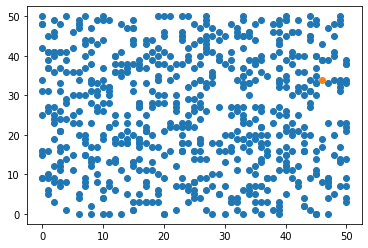

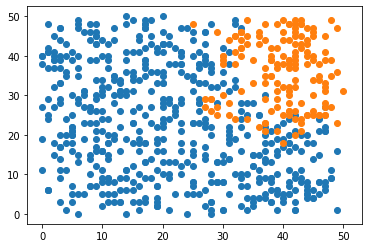

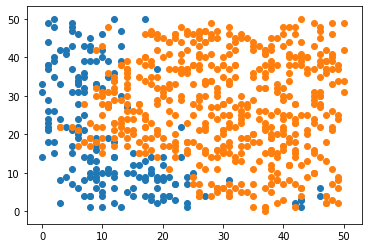

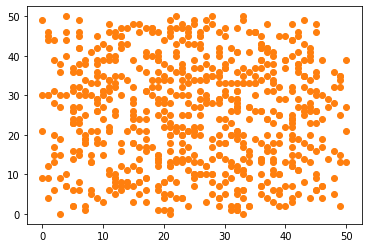

In [16]:
initial_state(r=50,a = 683,old=False)
for i in range(350):
    next_pos()
    illegal_pos()
    collision(dead1=False,old=False,Base=True,dead2=False)
    if i%100 == 0:
        Show_walkers()
    
    

In the above scatter plots it can be seen that the full population is converted in to zombies after 350 hours, this can be seen clearly that with every passing hour the zombies are spreading constantly and after sometime the whole population is consumed by zombies. That means, that if we leave one zombie than it will convert the whole population in to zombies and humans will not react in any way. That means human will continously will be converted in to zombies and there is nothing they can do but run and wait for their turn.

#### PART 2: 
In this part, we are solving the model by putting the values of model parameters in the model ( nxy_ = 50, q = 0.9, N = 682 & Z(0) = 1). We will run the model for 100 iterations and record the results.  For each time step, we will calculate the mean and standard deviation of number of humans and zombies in the total population. These results will then be plotted in the graph representing the expected time development of the humans and zombies population and behaviour will also be checked against the analytical soultion of SZ model to gain further insight over the model.

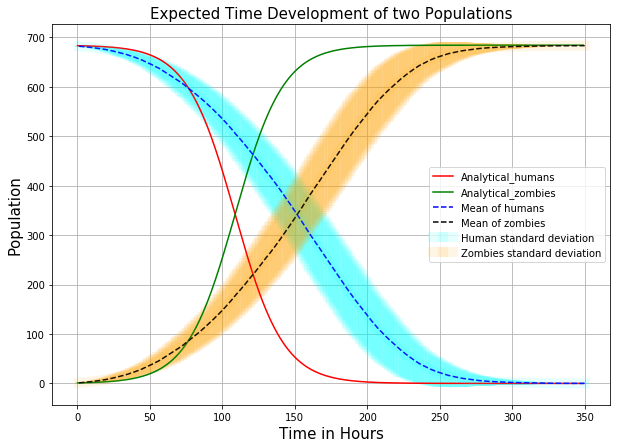

In [17]:
""" In this Program the MC_ex2 is monte carlo routine for N iteration """

def MC_ex2(N):                                    # function to run over number of iteratons
    hum=[]                                        # array to store human values
    zom=[]                                        # array to store zombie vales
    time=[]                                       # array to store time values 
    for i in range(N):
        h,z,t=Main(683,50,350,choice=1)          # calling Main function
        hum.append(h)                            # updating human values 
        zom.append(z)                            # updating zombie values
        time.append(t)                           # updating time values  
    return np.array(hum),np.array(zom),np.array(time)     # retrnung the required values 
 
h,z,t=MC_ex2(100)                                        # calling the function MC_e2
                                                        # h=humans ,z= zombies,t=time 

sol_st , sol_zt,time_ana = analytical_sol(0,350,1,683,1)          # calling the analytical solution function
                                                                #sol_st=humans,sol_zt=zombies,time_ana=time

    
" calucating the mean for Random walk "    
humans_mean = [np.mean(k) for k in zip(*h)]             # Mean for humans
zombies_mean = [np.mean(k) for k in zip(*z)]            # Mean fro zombies
time_mean = [np.mean(k) for k in zip(*t)]               # Mean for time 
humans_std = [np.std(k) for k in zip(*h)]               # Standard Deveation for humans          
zombies_std = [np.std(k) for k in zip(*z)]              # standard Deveation for zombies



"Plotting the results"

plt.figure(figsize=(10,7))

plt.title("Expected Time Development of two Populations", fontsize=15)
plt.xlabel("Time in Hours",fontsize=15)
plt.ylabel("Population",fontsize=15)

plt.plot(time_ana, sol_st, '-r',label='Analytical_humans')
plt.plot(time_ana, sol_zt, '-g',label='Analytical_zombies')

plt.plot(time_mean,humans_mean,'--b',label='Mean of humans')
plt.plot(time_mean,zombies_mean,'--k',label='Mean of zombies')

plt.errorbar(time_mean,humans_mean,humans_std,label='Human standard deviation',alpha=0.1,color='cyan',linewidth=10)
plt.errorbar(time_mean,zombies_mean,zombies_std,label="Zombies standard deviation",alpha=0.1,color='orange',linewidth=10)

plt.legend()
plt.grid()

###### In the graph plotted above, the expected time development of the two population i.e. humans and zombies can be clearly seen. Half of the total population is converted to the zombies after approx. 150 hours and whole population is converted  into zombies at approx. 290 hours. We have also plotted the standard deviations (computed uncertanity) of the two populations into the plot and there is little to no difference between behaviour of the mean and standard deviation for the two populations. We have also included the analytical result of the SZ model into the plot and concluded that MC solution diverges from the analytical solution of the system. This divergence is due to the  unique randomness of Monte Carlo techniques.

# Exercise 3: Estimating  𝛽  and the basic reproduction number
In this excercise, we are going to calculate the infection rate for different scenarios at different time and then will compare it with other beta and alpha values. This excercise will give an overview that how resisting and infection rate changes with the passage of time.

#### PART 1:

The original SZR model ingnored the incubation time while considering beta as constant. Therefore, we will calculate beta as a function of time by calculating $\beta\Delta t$ in this part where $\Delta t $ = 1 hour. We will also investigate the effect of lowering the probability q  from 0.9 to 0.2 on the model and estimate the $\beta $ again for this assumption. These results will be recorded and then plotted against the analytical soultion of the SZR model to understand the behaviour of model. 

In [18]:
""" In this Program MC_full is for  probality q=0.9 and MC_half is for  probality q=0.2"""

def MC_full(N):
    hum=[]
    zom=[]
    time_value=[]
    beta_1=[]
    for i in range(N):
        h,z,t_,beta=Main(683,50,350,choice=2)
        beta_1.append(beta)
        hum.append(h)
        zom.append(z)
        time_value.append(t_)
       
    return np.array(hum),np.array(zom),np.array(time_value),np.array(beta_1)

def MC_half(N):
    hum=[]
    zom=[]
    time_value=[]
    beta_1=[]
    for i in range(N):
        h,z,t_,beta=Main(683,50,350,choice=3)
        beta_1.append(beta)
       
        hum.append(h)
        zom.append(z)
        time_value.append(t_)
       
    return np.array(hum),np.array(zom),np.array(time_value),np.array(beta_1)

In [19]:
" Calling the functions for over N interations"

humans,zombies,time_v,beta_value=MC_full(100)
humans_new,zombies_new,time_v_new,beta_value_new=MC_half(100)

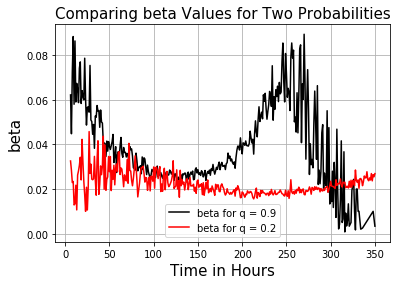

In [20]:
"beta and time when proability q=0.9"

time_1=[np.mean(k) for k in zip(*time_v)]              # calucalting mean of time
beta_1=[np.mean(k) for k in zip(*beta_value)]          # calucalting mean of beta
time_1 = np.asarray(time_1)                            # converting time list to array
beta_1=np.asarray(beta_1)                              # converting beta list to array
beta_1_old=np.argwhere(beta_1)                         # finding the indices of beta value where there are non zeors values and assigning to newbeta
beta_non_zeros_old=itemgetter(*beta_1_old)(beta_1)     # find the the values of indices where there is non zeros beta value and assining to new variable
time_non_zeros_old=itemgetter(*beta_1_old)(time_1)     # finding corresponidng time values where beta values are not zeros

"beta and time when proability q=0.2"

time_0=[np.mean(k) for k in zip(*time_v_new)]
beta_0=[np.mean(k) for k in zip(*beta_value_new)]
time_0 = np.asarray(time_0)
beta_0=np.asarray(beta_0)
beta_0_new=np.argwhere(beta_0)
beta_non_zeros_new=itemgetter(*beta_0_new)(beta_0)
time_non_zeros_new=itemgetter(*beta_0_new)(time_0)


" Comparing the results by plotiin the graphs "

plt.title("Comparing beta Values for Two Probabilities", fontsize = 15)
plt.plot(time_non_zeros_old[5:],beta_non_zeros_old[5:],"k-",label='beta for q = 0.9')
plt.plot(time_non_zeros_new[5:],beta_non_zeros_new[5:],"r-",label='beta for q = 0.2')
plt.xlabel("Time in Hours", fontsize = 15)
plt.ylabel("beta", fontsize = 15)
plt.legend()
plt.grid()

###### In the above graph, it can be clearly interpreted that system behaves quite differently for different probabilities of becoming zombies  (q) values. 
###### When the value of q is taken as 0.9, the probability of infection i.e. beta started with a maximum value  followed by gradual decrease upto 130 hours showing that when the population of zombies was less, infection spreaded very slowly. But, after 130 hours, beta again started to rise uptill 260 hours showing that most of the human population was converted to zombies. After 260 hours, beta values again started to decline and became nearly zero indicating that whole human population was converted into zombies. 
###### However, when the value of q was taken as 0.2, the probability of infection i.e. beta started to increase gradually and went to show a approximately linear behaviour after 120 hours, indicating that humans were converted into the zombies in a linear manner. 


#### PART 2:

In this part, we will again keep the probability q = 0.9. However, for every human who survives the zombie encounter, we will half the value of probability of being turned into zombie q for that person. We will again find the value of $\beta$ as function of time and plot these results against the ones calculated in the project 3  which was based upon the compartment models i.e. $\beta(t)=\beta_0e^{-\lambda t}$? 

In [21]:
"MC_part 2 is the fucntion to find the beta value "

def MC_part2(N):
    hum=[]                                      # array for humans
    zom=[]                                      # array for zombies
    time_value=[]                               # array for time
    beta_1=[]                                   # array for beta
    for i in range(N):
        h,z,t_,beta=Main(683,50,400,choice=5)   # caling the Main function
        beta_1.append(beta)
        hum.append(h)
        zom.append(z)
        time_value.append(t_)
       
    return np.array(hum),np.array(zom),np.array(time_value),np.array(beta_1)   # retunning the values

In [22]:
# h=humans,z=zombies,tn=time,b=beta 

h,z,tn,b= MC_part2(100)   # calling the function 

In [23]:
humans = [np.mean(k) for k in zip(*h)]
zombies = [np.mean(k) for k in zip(*z)]
time_ = [np.mean(k) for k in zip(*tn)]
beta=[np.mean(k) for k in zip(*b)]
beta=np.asarray(beta)
beta_0=np.argwhere(beta)
beta_value=itemgetter(*beta_0)(beta)
time_hours = np.asarray(time_)
time_in_hours=itemgetter(*beta_0)(time_hours)

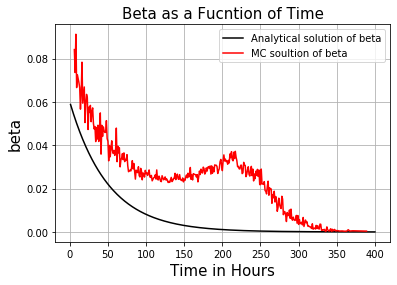

In [24]:

"""caluclating the analytical value of beta
"""
t_final=400                   # no hours to run simulation
beta=[]
time=[]
t=0
while (t<t_final):        
    t=t+1
    b=0.06*np.exp(-0.02*t)    # here lambda is considered as 1/48
    beta.append(b)
    time.append(t)

" Plotting the results " 

plt.plot(time,beta,"k-", label = "Analytical solution of beta")      
plt.plot(time_in_hours[5:],beta_value[5:],"r-", label = "MC soultion of beta ")
plt.title("Beta as a Fucntion of Time", fontsize = 15)
plt.xlabel("Time in Hours", fontsize = 15)
plt.ylabel("beta", fontsize = 15)
plt.legend()
plt.grid()

###### The above graph clearly indicates that beta values calculated using MC simulation showed the similar behaviour as that of analytical solution of the SZR model uptill approx. 150 hours. However, after 150 hours, unlike analytical solution, it started to gradually increase again till 230 hours and after that, it showed the same behaviour as that of analytical solution. This indicates that initially when there was only one zombie, the infection spreaded very slowly. However, after 150 hours, humans started to convert into zombies more rapidly which causes sudden spike for the increase of beta value. After 230 hours, when most of the humans got converted into zombies, beta again started to decrease and become zero at approx. 350 hours while for analytical solution, whole population were converted into zombies after 250 hours. 

#### PART 3:
In this part, we will updating our assumptions from the previous part as we considering two scenarios here. For every human who survives the zombie encounter, we will consider two option. We will increase the porbability of surviving and human will kill the zombie. We will then estimate the recovery rate $\alpha$ in the same manner as that of $\beta$ as a function of time. We will also calculate the basic reproduction number $\mathcal{R}_0(t)=\beta(t)/\alpha(t)$ and will investigate the behaviour of model.

In [25]:
" In this Monte_carlo_dead is the fucntion to caluclate alpha,beta and reproduction number"
import time as t_t
def Monte_carlo_dead(N):
    hum_pop=[]
    zom_pop=[]
    time_value=[]
    beta_1=[]
    alpha_1=[]
    dead_count = []
    rep_rate=[]
    for i in range(N):
        h_,z_,t_,beta_,alpha_,dead_array,re_po=Main(683,50,500,choice=4)
        beta_1.append(beta_)
        alpha_1.append(alpha_)
        hum_pop.append(h_)
        zom_pop.append(z_)
        time_value.append(t_)
        dead_count.append(dead_array)
        rep_rate.append(re_po)
    return np.array(hum_pop),np.array(zom_pop),np.array(time_value),np.array(beta_1),np.array(alpha_1), np.array(dead_count),np.array(rep_rate)
start_time = t_t.time()
h_h,z_h,t_1,beta_h,alpha_h,d_h,r_h=Monte_carlo_dead(100)    # Calling the function 
print("--- %s seconds ---" % (t_t.time() - start_time))

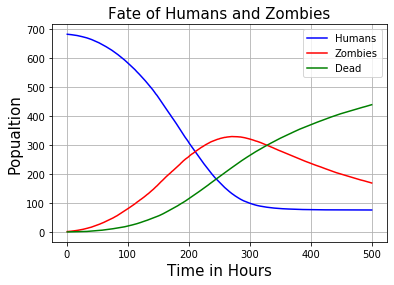

In [26]:
population_dead=[np.mean(k) for k in zip(*d_h)]                # mean off dead population
population_humans = [np.mean(k) for k in zip(*h_h)]            # mean of humans
population_zombies = [np.mean(k) for k in zip(*z_h)]           # mean of zombies
time_hours = [np.mean(k) for k in zip(*t_1)]                   # meam of time
reproduction_rate=[np.mean(k) for k in zip(*r_h)]              # mena of reprodction number


"Plotting the resuts "

plt.title("Fate of Humans and Zombies", fontsize = 15)
plt.xlabel("Time in Hours",fontsize = 15)
plt.ylabel("Popualtion",fontsize = 15)
plt.plot(time_hours,population_humans,"b-",label="Humans")
plt.plot(time_hours,population_zombies,"r-",label="Zombies")
plt.plot(time_hours,population_dead,"g",label="Dead")
plt.legend()
plt.grid()

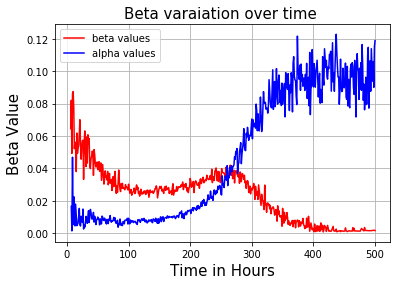

In [27]:
" Caluclating non zeros beta and time values"

beta_h=np.asarray(beta_h)                   #Converting the beta in to array
beta=[np.mean(k) for k in zip(*beta_h)]     # Mean value of beta
beta=np.asarray(beta)                       #Converting mean value of beta
beta_0=np.argwhere(beta)                     #Removing the zero value from beta
beta_value=itemgetter(*beta_0)(beta)        #getting all the vlues from the beta which are non-zero
time_hours = np.asarray(time_hours)          
time_in_hours=itemgetter(*beta_0)(time_hours)  #Getting the same timing where beta is non zero

" Caluclating non zeros apha  and time values"
alpha_h=np.asarray(alpha_h)                  #Same procedure for getting non-zero value of Alpha
alpha=[np.mean(k) for k in zip(*alpha_h)]
alpha=np.asarray(alpha)
alpha_0=np.argwhere(alpha)
alpha_value=itemgetter(*alpha_0)(alpha)
time_hours = np.asarray(time_hours)
time_in_alpha=itemgetter(*alpha_0)(time_hours)

"Plottting the graphs of alpha and beta "

plt.title("Beta varaiation over time ", fontsize = 15)
plt.plot(time_in_hours[5:],beta_value[5:],"r",label="beta values")
plt.plot(time_in_alpha[5:],alpha_value[5:],"b",label="alpha values")
plt.xlabel("Time in Hours",fontsize = 15)
plt.ylabel("Beta Value",fontsize = 15)
plt.legend()
plt.grid()

###### From the above two graphs, it can be concluded that the human population decrease  and zombie population will increase in the similar manner uptill 270 hours. However, after that human population becomes nearly constant and zombie population started to decrease because humans will be aware of their surroundings and they will start to kill zombies and this can be clearly seen due to increase of dead population into the graph. The beta vs alpha graph also gives the similar interpretation that when the humans started killiing zombies, recovery rate alpha will starting to increase and probability of infection will decrease. The spike in recovery rate at the start is explained by the fact that there is only one zombie at the start of the simulation.

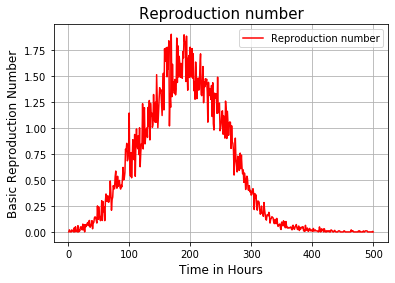

In [28]:
" plotting the result for reproduction number"

plt.title("Reproduction number",fontsize = 15)
plt.plot(time_hours,reproduction_rate,"r-",label='Reproduction number')
plt.xlabel("Time in Hours",fontsize = 12)
plt.ylabel("Basic Reproduction Number",fontsize = 12)
plt.legend()
plt.grid()

###### The graph explains the behaviour of basic reporoduction number of the assumed SZR model. It is clearly indicated that Ro gradually increases uptill 200 hours. This is explained by the fact that recovery rate was low as humans were not killing the zombies, therefore, probability of infection increased. However, when humans started killing zombies, the rate of recovery increases in the similar manner which can be clearly seen in the graph in the latter half of graph where reproduction number is gradually decreasing. 

# Exercise 4: Old and young population - who survives?

#### PART 1: 
In this exercise, we will get a further insight over the SZR model by dividing the human population into young and old humans. Both the group will have same population i.e. $(N-1)/2=341$. Young humans and zombies are allowed to move in all four direction as before. However, the old humans will move slow and probability of moving will be now be updated with a value of 20%. We will then simulate the model and investigate the behaviour of human and zombies population in the lattice. We will then compare these results with the previous model when all the humans will move in the same way. This will give us a better understanding of SZR model behaviour. 

#### CASE 1: Humans never learn anything after meeting the zombies
In this case,We are assuming that humans do not learn in their encounter and will die everytime they face a zombie. We will observe how the old and young populatin react to zombies and what will be the end result regarding this. Old humans are forced to move 20% slower than other humans. So, keeping the above assumptions in mind we can check the results after this. 

In [29]:
" MC_part4 is the fucntion to perform Monte carlo routine "

def MC_part4(N):
    hum_old=[]
    hum_young=[]
    zom_pop=[]
    time_value=[]
    beta_1=[]
    for i in range(N):
        h_o,h_y,z_n,t_=Main(683,50,450,choice=6)
        hum_old.append(h_o)
        zom_pop.append(z_n)
        hum_young.append(h_y)
        time_value.append(t_)
       
    return np.array(hum_old),np.array(hum_young),np.array(zom_pop),np.array(time_value)

In [30]:
start_time = t_t.time()
ho,hy,zn,tn=MC_part4(100)                       # calling the fucntion 
print("--- %s seconds ---" % (t_t.time() - start_time))
# h_h,z_h,t_1,beta_h,alpha_h,d_h,r_h=Monte_carlo_dead(10)

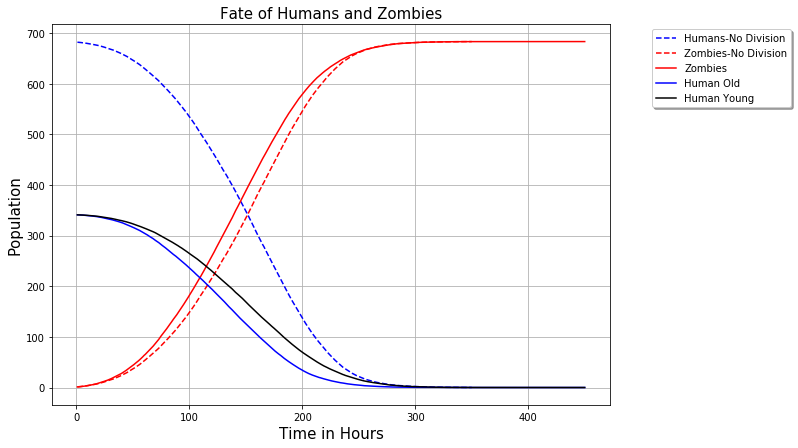

In [31]:
humans_old = [np.mean(k) for k in zip(*ho)]                     # mean of humans old 
humans_young = [np.mean(k) for k in zip(*hy)]                   # mean of humans young
zombies = [np.mean(k) for k in zip(*zn)]                        # Mean of zombies 
time_ = [np.mean(k) for k in zip(*tn)]                          # mena of time 

"Plotting the resluts "

plt.figure(figsize=(10,7))
plt.plot(time_mean,humans_mean,'--b',label='Humans-No Division')
plt.plot(time_mean,zombies_mean,'--r',label='Zombies-No Division')

plt.plot(time_,zombies,'-r',label="Zombies")
plt.plot(time_,humans_old,'-b',label="Human Old")
plt.plot(time_,humans_young,'-k',label="Human Young")

plt.title("Fate of Humans and Zombies", fontsize = 15)
plt.xlabel("Time in Hours",fontsize = 15)
plt.ylabel("Population",fontsize = 15)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),shadow=True, ncol=1)
plt.grid()


###### This graph clearly shows that when we divided the human population into young and old humans, the young humans were more resilient and their population is taking more time to convert into the zombies. At 110 hours, young human population was around 250, however, old population was approx. 200 at that point. Also, when humans were divided into young and old , they showed more rapid decrease in human population in total (at 100 hours ,  approx. 450 humans) as compared to the human population when it was not divided (at 100 hours, approx. 520 humans). The zombies population is also affected by these divisions, however, difference is very small.

#### CASE 2: Humans kill the zombies
In this case, we assume that huamns have learned to fight back, and they will kill zombies whenever they get a chance, by keeping this mind. The human will only be kill zombies by a chance of 10% but everytime a human survives an encounter he will be able to increase his propaility by a factor of 50%, So, if he gets attacked by the zombie second time there are better chances that human will kill the zombie. 


In [32]:
" MC_part42 is the fucntion to perform Monte carlo routine "

def MC_part42(N):
    hum_old=[]
    hum_young=[]
    zom_pop=[]
    time_value=[]
    dead_1=[]
    for i in range(N):
        h_o,h_y,z_n,d_,t_=Main(683,50,500,choice=7)
        hum_old.append(h_o)
        zom_pop.append(z_n)
        dead_1.append(d_)
        hum_young.append(h_y)
        time_value.append(t_)
       
    return np.array(hum_old),np.array(hum_young),np.array(zom_pop),np.array(time_value),np.array(dead_1)

In [33]:
start_time = t_t.time()
h_o,h_y,z_n,t_n,d_n=MC_part42(100)   # calling the function
print("--- %s seconds ---" % (t_t.time() - start_time))

In [34]:
humans_old_ = [np.mean(k) for k in zip(*h_o)]           # mean of humans old
humans_young_ = [np.mean(k) for k in zip(*h_y)]        #mean of humans young
zombies_ = [np.mean(k) for k in zip(*z_n)]            # mean of zombies
time_1 = [np.mean(k) for k in zip(*t_n)]              # mean of time 
dead_=[np.mean(k) for k in zip(*d_n)]                 # mena of dead 

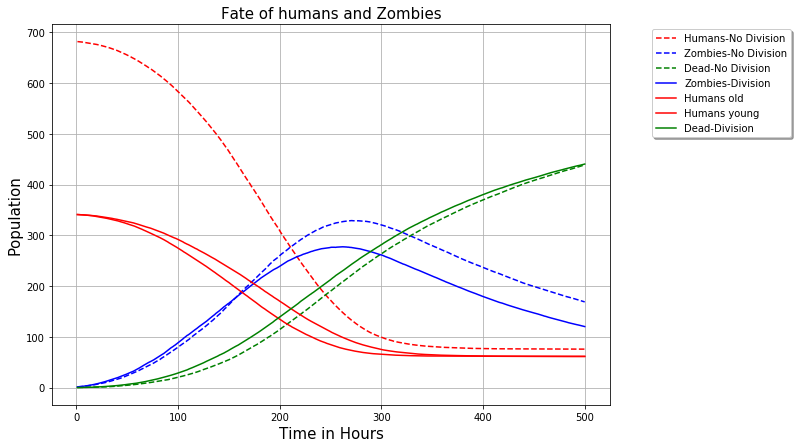

In [35]:
plt.figure(figsize=(10,7))
plt.title("Fate of humans and Zombies", fontsize = 15)
plt.xlabel('Time in Hours', fontsize = 15)
plt.ylabel('Population', fontsize = 15)
plt.plot(time_hours,population_humans,'--r',label="Humans-No Division")
plt.plot(time_hours,population_zombies,'--b',label="Zombies-No Division")
plt.plot(time_hours,population_dead,'--g',label="Dead-No Division")
plt.plot(time_1,zombies_,'b',label='Zombies-Division')
plt.plot(time_1,humans_old_,'-r',label='Humans old')
plt.plot(time_1,humans_young_,'-r',label='Humans young')
plt.plot(time_1,dead_,'-g',label='Dead-Division')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),shadow=True, ncol=1)
plt.grid()

###### In the graph plotted above, it is clearly mentioned that when we divided the human population into young and old, old population was converting into the zombies more rapidly as compared to the young humans. Also, when human population was divided into two equal halves, they showed slightly rapid decrease in human population as compared to the case when human population was not divided. However, they were more humans left at the end of the outbreak when humans were divded. The zombie population also showed the similar pattern and their population was less when humans were divided into young and old popultion. The dead population showed a very little difference in both cases, however, their final number was also less than the dead population when human were not divided. Therefore, by dividing the  humans into young and old population benefitted their total population at the end. 

# Excercise # 5 : Implementing Our Own Scenario
In this excecise we are going to add some certain assumptions.

- First, We are going to build some fence around the end of the map, to guard the humans from the zombies, that means that within that limit no zombie will enter and only humans are allowed to enter in that area. 
- Second, we are going to intrudce a kill squad that will kill zombies as the time passes. This kill squad cannot be killed and has a total number of 20 people from young and old population. 
- Third, whenever a zombie attacks a old human then there is a 30% chance that the old human will kill the zombie, if not then the old human relectuantcy to future attacks will increase and probability to die will reduce by 50% evertime the human survives.

In [36]:
def initial_state1(r,a,old,ex5):
    global N_           # Total population
    global nxy_         # Lattice size (a square) nx=ny
    global State_
    global HUMAN_  
    global ZOMBIE_ 
    global DEAD_   
    global Humans
    global zombies
    global dead
    global YOUNG_
    global OLD_
    global Walkers_     # (x,y) coordinate of each walker at time T
    global Walkers_Old_
    global q
    
    nxy_= r
    N_=a
    HUMAN_  = 0
    ZOMBIE_ = 1
    DEAD_   = 2
    YOUNG_ = 3
    OLD_= 4
    Walkers_=np.random.randint(nxy_+1,size=(N_,2))
    q = np.full(len(Walkers_),0.9)
    if (ex5 == True):
        q[100:122] = 0
    State_[0]=ZOMBIE_
    State_=np.zeros(N_,dtype=int) # Set all Walkers to Human
    if old == True:
        State_[0:1]=ZOMBIE_             # Set one of them to a Zombie
        State_[10:342]=OLD_
        State_[342:]=YOUNG_
        Humans=Walkers_[np.logical_or(State_==OLD_,State_==YOUNG_)]
        zombies= Walkers_[State_==ZOMBIE_]
    else:
        Humans=Walkers_[State_ == HUMAN_]
        zombies= Walkers_[State_==ZOMBIE_] 
    Walkers_Old_ = Walkers_.copy()
    return

In [37]:
def main():
    global Humans
    global zombies
    global dead
    zombies = np.where(State_ == ZOMBIE_)[0]

    for i, i_zom in enumerate(zombies):
                pos_x = Walkers_[i_zom, 0]
                pos_y = Walkers_[i_zom, 1]               # Find coordinates of the current zombie:

                # Find indices of all walkers that are at the same place:
                ids_same_place = np.where((Walkers_[:, 0] == pos_x) & (Walkers_[:, 1] == pos_y))[0]
                # We are only interested in the humans:
                humans_same_place = ids_same_place[np.logical_or(State_[ids_same_place]==OLD_, State_[ids_same_place]== YOUNG_)]

                for i in range(len(humans_same_place)):
                    u = np.random.uniform(0,1)
                    if (u < q[humans_same_place[i]]):
                        State_[humans_same_place[i]] = ZOMBIE_
                    elif State_ [humans_same_place[i]] == OLD_:
                        v = np.random.uniform(0,1)
                        if v< 0.3:
                            State_[i_zom] = DEAD_
                        q[humans_same_place[i]] = q[humans_same_place[i]]*0.5
                        
                    else:
                        q[humans_same_place[i]] = q[humans_same_place[i]]*0.5
                        
                        
    zombies= Walkers_[State_==ZOMBIE_]
    Humans=Walkers_[np.logical_or(State_==OLD_,State_==YOUNG_)]
    Humans_old=Walkers_[State_==OLD_]
    Humans_young=Walkers_[State_==YOUNG_]
    dead = Walkers_[State_==DEAD_]
    z_num,ho_num,hy_num,d_num,h = len(zombies),len(Humans_old),len(Humans_young),len(dead),len(Humans)
    return ho_num, hy_num,z_num,d_num,h

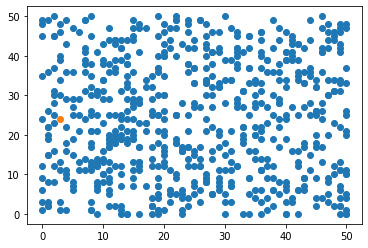

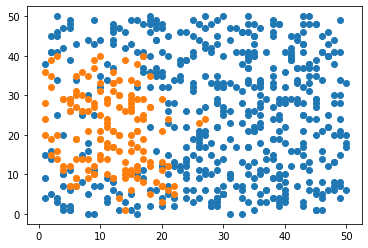

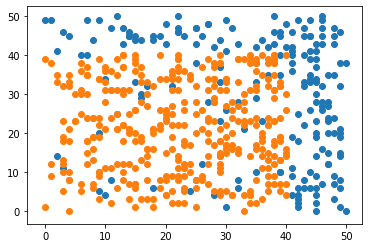

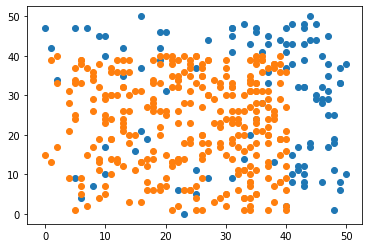

In [38]:

initial_state1(r=50,a=682,old=True,ex5= True)
ho,hy,z,hum,de= [],[],[],[],[]
for i in range(400):
    next_pos()
    illegal_pos()
    fence()
    d,f,g,k,h= main()
    ho.append(d)
    hy.append(f) 
    z.append(g) 
    de.append(k)
    hum.append(h)
    if i%100 == 0:
        Show_walkers()
        

In the scatter plots above it can be observed that zombies starts converting humans and nearly wipe them out near the 300 hours but it can be observed that humans which are inside the fence were not harmed until they started moving inside the zombies side, anouther can also be observed that the zombies population is steadily decreasing because the kill squad is killing them at a constant pace along with other humans who are getting trained by every encounter they survive, this makes this simulation very interesting because human and zombie interaction is little bit limited due to the presence of a fence in the area. But at  the same time all the humans who are present inside the zombies area were quickly converted or killed by the zombies. Further explaination can be given after making some graphs out of these. 

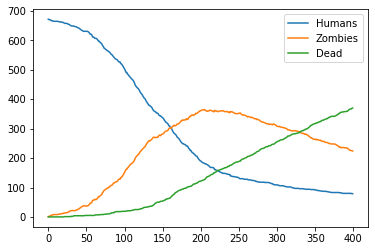

In [39]:
t = np.arange(400)
plt.plot(t,hum,label = "Humans")
plt.plot(t,z,label = "Zombies")
plt.plot(t,de,label = "Dead")
plt.legend()
plt.show()

This graph explains that at the beginning humans will be converted in to zombies at a very fast pace but the kill squad will stil be killing them in the initial stage. Even though most of the humans got converted in to zombies but some still survived either because of their interaction with zombie and surviving or being inside the fence, during rampant zombie attacks. This graph shows that with every passing minute all the zmobies will be eventually killed and only humans will survive. This can also be observed that Humans population is decreasing steadily and becoming steady while the zombie population is still decreasing with every passing hour. This shows that humamns learned how to fight and now killing zombies with every thing they have.

<h1><center>Summary</center></h1>
<p style='text-align: justify;'> In this project we learned how to use monte carlo simulation to get a solution, during the first excercise we learned how to use monte carlo method to get a rough idea about how to solve a situation with probability in mind, to get more accurate results we ran the simulation for more than 100 times to get more accurate results along with mean and standard deviation along with it. Monte Carlo simulator is an excellent tool to solve different equations fow whom finding analytical solution is very difficult. The the part 2 we decided to run the simulation on a latex and give it some population to get an idea how outbreaks occur. We noticed that the outbreaks becomes more rampant during the middle and then it comes down after sometime. Infection rate increases with more human to zombie interaction due to increased number of zombies at the same spot as humans. At the start, humans dont know how to reach and usually end up dying or being converted in to zombie. But in the later parts humans decided to fight back and started killing zombies, this too did not end in a very good condition becuase it took a lot of human population to actually kill zombies and both end up dying. In Excercise 3 we compare beta results for two different probabbilities of survival and it is visible that if the probability of surviving is more than there are more chances to survive the epidemic them if the probability is decreasing with the passage of time. When humans start retaiiting then the production number peaks in the middle because at that point the humans are being converted in to zombies but at the same tine there were not enough zombies being killed causing the reproduction to rise up at those levels. In later excercises we divided the population in two groups to check how the results will differ from other scenarios, in this case as expected the older population reached to their half at around 20 to 30 hours before the younger poplaton reached half of the starting population. This shows that the chances of survival becomes more slip if you belong to the older population group. We also upgraded the value of q in certain cases in which if a human survives he will more resistant to the attack then previous time. These simultoons gave some extra humans at the end to fight off zombies and kill as much as possible. In last excercise, it is quite visible that humans die off at  much fast rates than zombies at the start but at the same time humans are also killing zombiies. This proved that humans will kill of all the zombies if this continues. Because after sometime zombies will no longer to kil humans due to their increased training and kill squad in action. The fence stopped the zombies from entering in that area thus helping the humans the initial time to start and then start killing the zombies near the end. Overall, this project was a great learning experience and helped me understand the how monto carlo simulations work and what to expect from. </p>

# References:
1. Christopher Pease (2019) An Overview of Monte Carlo Methods, Available at: https://towardsdatascience.com/an-overview-of-monte-carlo-methods-675384eb1694.
2. Wikipedia (2019) Random walk, Available at: https://en.wikipedia.org/wiki/Random_walk.
3. Rohan Joseph (2019) The house always wins : Monte Carlo Simulation, Available at: https://towardsdatascience.com/the-house-always-wins-monte-carlo-simulation-eb82787da2a3.
4. stack-overflow-specfics (2019) Random walk in python, Available at: https://stackoverflow.com/questions/35410413/random-walk-in-python (Accessed: ).
5. Aksel Hiorth () Computational Engineering and Modeling, Available at: https://github.com/ahiorth/CompEngineering (Accessed: 2019).